# Electronic_sales_Data Analysis

The dataset contains user ratings for various electronics items sold, along with the category of each item and time of sale.

In [38]:
import pandas as pd
import mysql.connector

mydb = mysql.connector.connect(host="localhost",user="root",password="",database="electronic_sales_data")
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM cleaned")
myresult = mycursor.fetchall()
dataset = pd.DataFrame(myresult, columns=[col[0] for col in mycursor.description])
print(dataset.head())

   item_id  user_id  rating  timestamp  gender    category    brand  year  \
0        7      131       4      36692  Female  Home Audio  Philips  2000   
1       19      231       5      36891  Female      Camera    Canon  2000   
2       14      233       5      36893  Female      Camera    Kodak  2001   
3       14      257       5      36926  Female      Camera    Kodak  2001   
4       14      269       5      36952  Female      Camera    Kodak  2001   

   month  quantity  unitprice  amount  
0      6         5       6360   31800  
1     12        10       9955   99550  
2      1         9       7639   68751  
3      2         7       5097   35679  
4      3        10       6472   64720  


In [40]:
# list of last five rows
dataset.tail()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
45161,7828,1157458,5,43341,Female,Headphones,Bose,2018,8,7,5925,41475
45162,8624,1157504,5,43342,Female,Headphones,Pyle,2018,8,7,9717,68019
45163,9513,1157527,5,43344,Male,Headphones,Mpow,2018,9,8,9197,73576
45164,9125,1157555,3,43348,Female,Headphones,EldHus,2018,9,10,8848,88480
45165,9478,1157632,1,43374,Female,Headphones,Etre Jeune,2018,10,7,7717,54019


In [41]:
# shape
dataset.shape

(45166, 12)

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB


In [43]:
# the statistical summary of the dataset.
dataset['rating'].describe()

count    45166.000000
mean         4.218594
std          1.221118
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [44]:
#the number of unique users and items in the dataset.
dataset.nunique()

item_id       1892
user_id      40401
rating           5
timestamp     4179
gender           2
category        10
brand           50
year            19
month           12
quantity         6
unitprice     5001
amount       19611
dtype: int64

In [45]:
# checking for missing values
dataset.isnull().sum()

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

### What was the best year of sales?

<Axes: title={'center': 'Year Wise Sales'}, xlabel='year'>

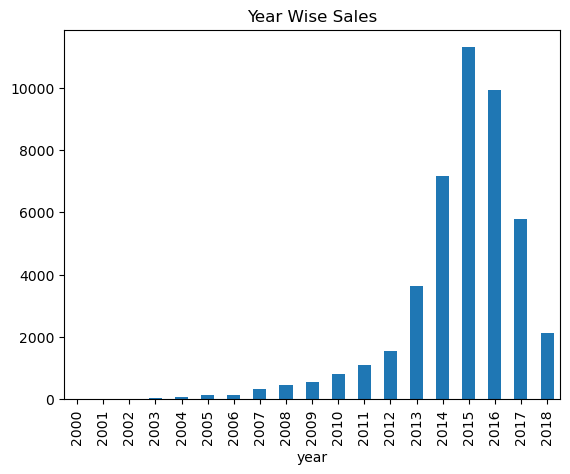

In [46]:
dataset.groupby('year')['amount'].count().plot(kind='bar',title='Year Wise Sales')

#### Inference:
From the graph we just plotted we can see that year 2015 had the best sales out of all
years.
There was a steady increase of sales from the year 2007 to 2015 then a slig

### Which was the best month for sales between 2015 t0 2018?

<Axes: xlabel='month'>

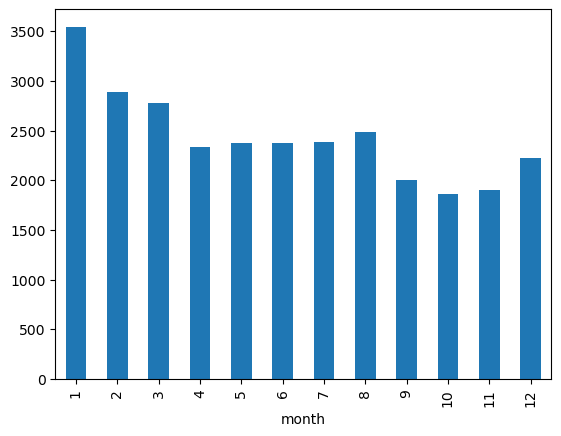

In [47]:
dataset_2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset_2015_2018.groupby('month')['rating'].count().plot(kind='bar')

#### Inference:
January was the month when most sales were made across the product categories and
over the years.

### What brand sold the most in the highest selling year(2015 to 2018)?

<Axes: title={'center': 'Brand Wise Top 10 Sales 2015 to 2018'}, xlabel='brand'>

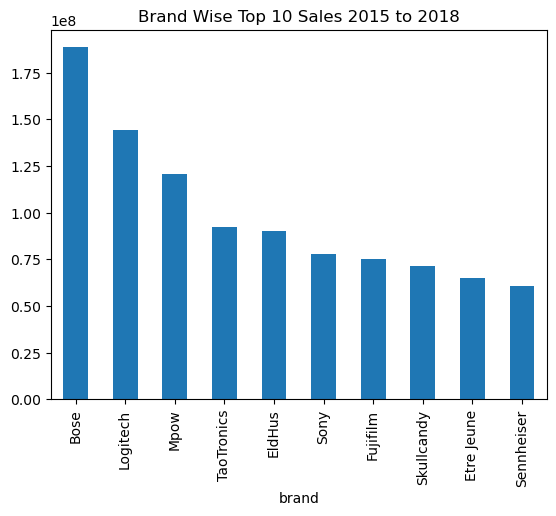

In [48]:
dataset_2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset_2015_2018.groupby('brand')['amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Brand Wise Top 10 Sales 2015 to 2018',y='amount')

#### Inference:
Bose was the brand with the most sales in 2015 to 2018 followed by Logitech.

 ### What products sold the most in the three years 2016, 2017 & 2018?

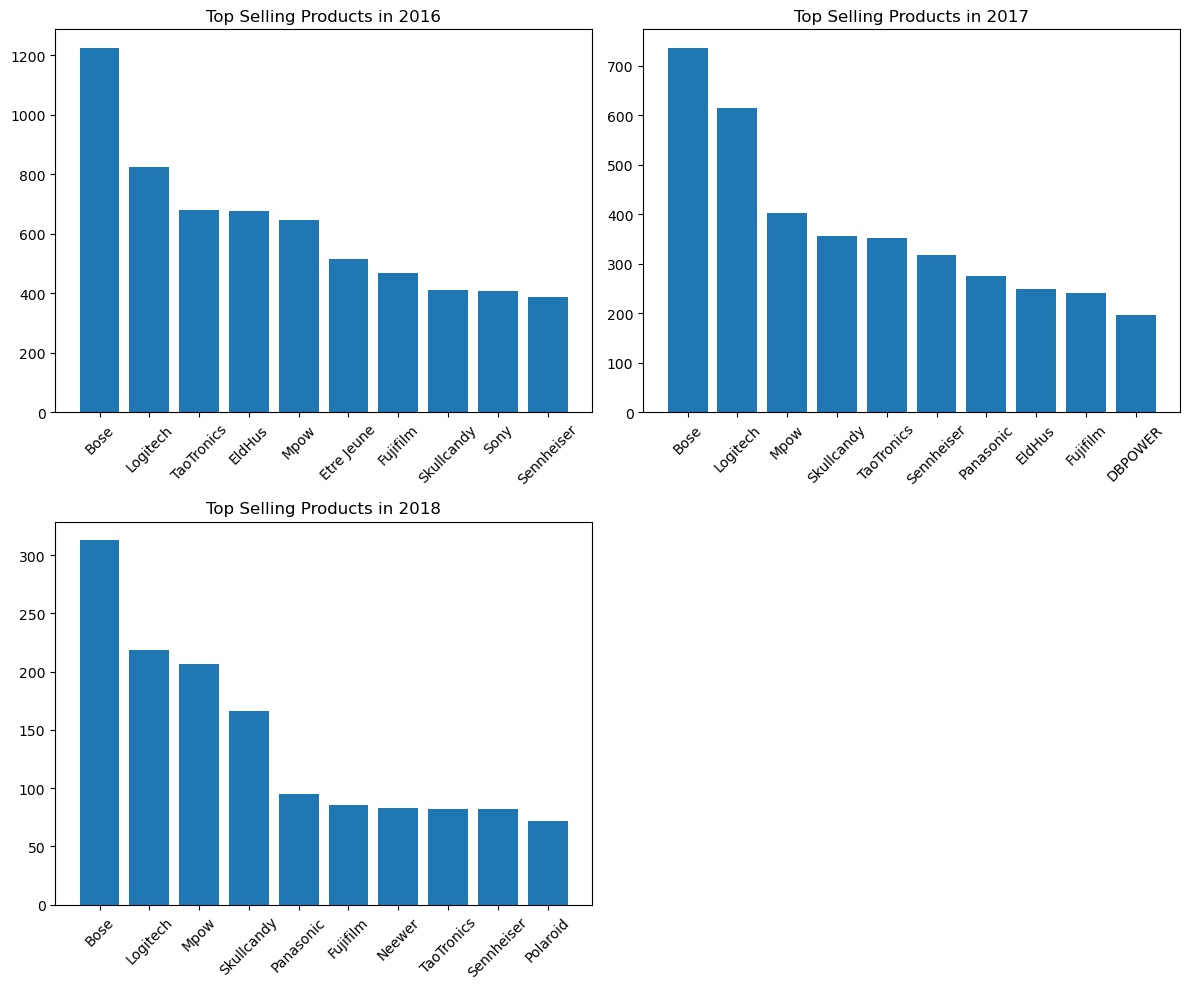

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Plot for 2016
top_selling_2016 = dataset[dataset['year'] ==
2016].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[0, 0].bar(top_selling_2016.index, top_selling_2016)
axs[0, 0].set_title('Top Selling Products in 2016')
axs[0, 0].tick_params(axis='x', rotation=45) # Rotate x-axis labels
# Plot for 2017
top_selling_2017 = dataset[dataset['year'] ==
2017].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[0, 1].bar(top_selling_2017.index, top_selling_2017)
axs[0, 1].set_title('Top Selling Products in 2017')
axs[0, 1].tick_params(axis='x', rotation=45) # Rotate x-axis labels
# Plot for 2018
top_selling_2018 = dataset[dataset['year'] ==
2018].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[1, 0].bar(top_selling_2018.index, top_selling_2018)
axs[1, 0].set_title('Top Selling Products in 2018')
axs[1, 0].tick_params(axis='x', rotation=45) # Rotate x-axis labels
axs[1, 1].axis('off')
plt.tight_layout()
plt.show()

#### Inference:
There has been one consistent Brand product with the most sales in the 3 years and it
is Bose.
The second most sold brand's products have been Logitech.

● 2016 (Bose and Logitech)
● 2017 (Bose and Logitech)
● 2018 (Bose and Logitech)

### What product by category sold the most between 2015 to 2018?

<Axes: title={'center': 'Top 10 Most Sold Product Category 2015 to 2018'}, xlabel='category'>

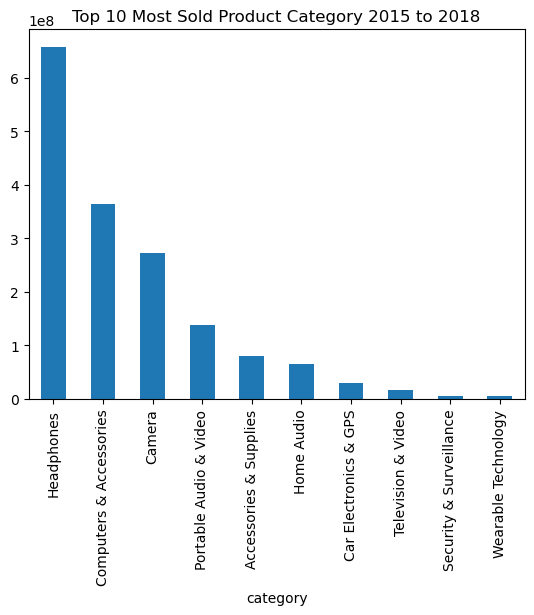

In [50]:
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 Most Sold Product Category 2015 to 2018')

#### Inference:
We can see that the category of Headphones sold the most, computers and
accessories were sold the second most while cameras sold the third most.

### What product by category sold the least between 2015 to 2018?

<Axes: title={'center': '10 Least Sold Product Brand 2015 to 2018'}, xlabel='category'>

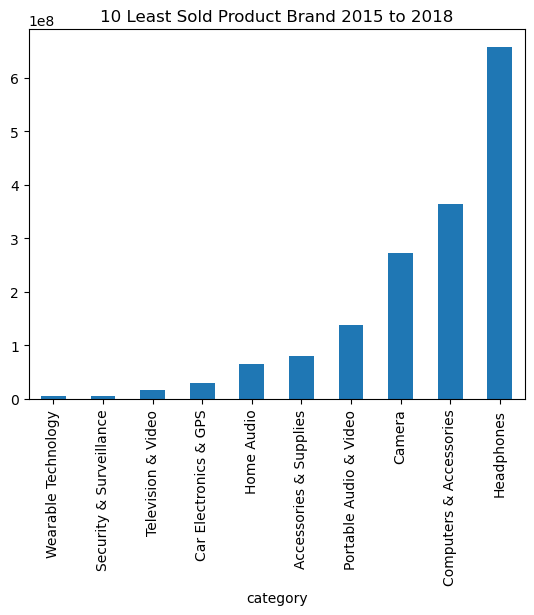

In [51]:
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='bar',title='10 Least Sold Product Brand 2015 to 2018')

#### Inference:
We can see that the category of Wearable Technology sold the least followed closely by
Security and Surveillance.

### What product by brand name sold the least between 2015 to 2018?

<Axes: title={'center': '10 Least Sold Product Brand 2015 to 2018'}, xlabel='brand'>

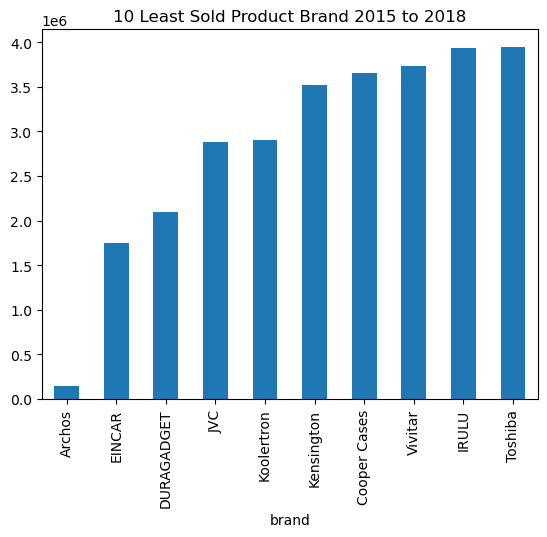

In [52]:
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('brand')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='bar',title='10 Least Sold Product Brand 2015 to 2018')

#### Inference:
Archos sold the least followed closely with EINCAR.

### Ratings Distribution

<Axes: xlabel='rating', ylabel='count'>

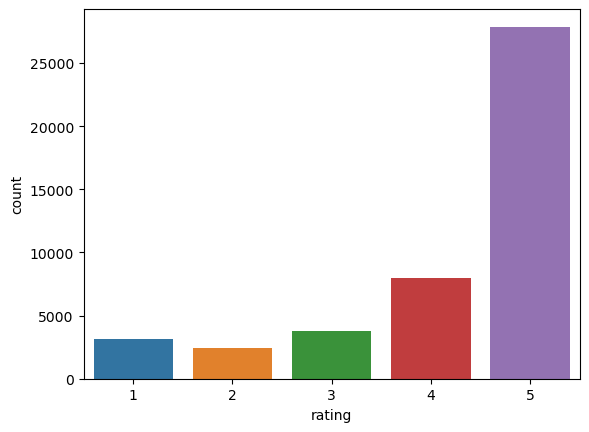

In [53]:
sns.countplot(x='rating', data=dataset)

#### Inference:
Most Products were rated 5

### Best rated brands

<Axes: title={'center': '10 most rating Brand 2015 to 2018'}, xlabel='brand'>

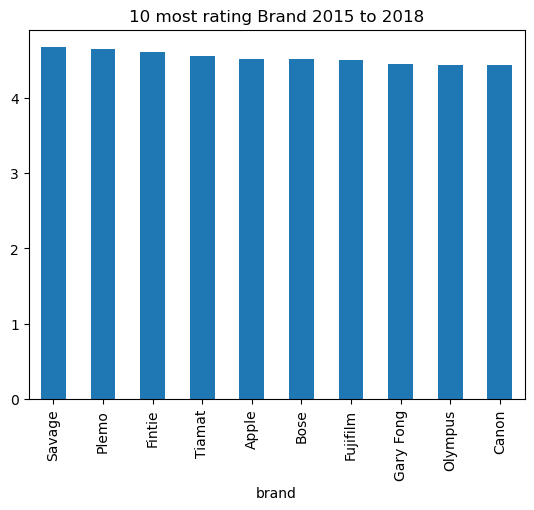

In [54]:
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar',title='10 most rating Brand 2015 to 2018')

#### Inference:
Savage and Plemo were the brands with the highest ratings.

### Top 5 category sales percentage

<Axes: title={'center': 'Top 5 category sales percentage'}, ylabel='amount'>

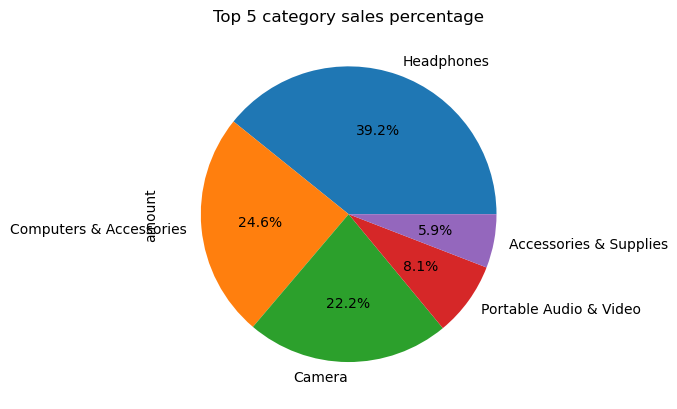

In [55]:
dataset.groupby('category')['amount'].sum().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 category sales percentage')

#### Inference:
Headphones sales % is the highest followed by Computers & Accessories.

### Brand wise sales percentage

<Axes: title={'center': 'Top 5 Brand wise sales percentage'}, ylabel='rating'>

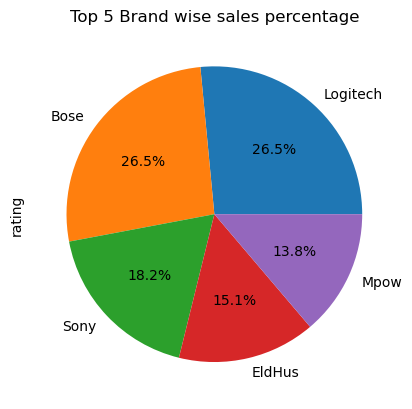

In [56]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 Brand wise sales percentage')

#### Inference:
Bose and Logitech sales % is the highest followed by Sony.

### Gender wise customer distribution

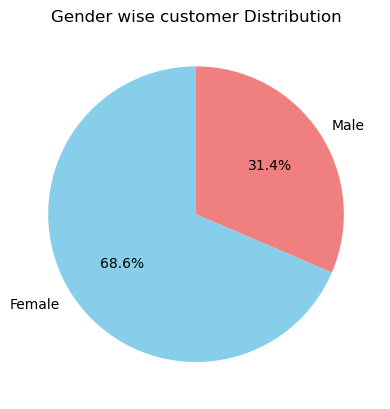

In [57]:
gender_distribution = dataset['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index,
autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender wise customer Distribution')
plt.show()

#### Inference:
Most of the customers are in Female categories.

## Conclusion:
● 2015 was the best year in terms of sales and profit

● Headphones was the category with most sales followed closely with Computer and Accessories while the least sales were made in the Category Security & Surveillance.

● There has been a steady rise in sales from 2007 to 2015 and a sharp decline from 2016 to 2018.

● The brand name Bose sold the most followed by Logitech.

● The brand Archos sold the least followed closely with EINCAR.

● Most products were rated 5.

● Best rated brands were Savage and Plemo.

#### With this foresight a company can make decisions whether to continue production/sales of a specific product for the future.